In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy as cr
import cartopy.feature as cf
import cartopy.crs as ccrs

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_righ

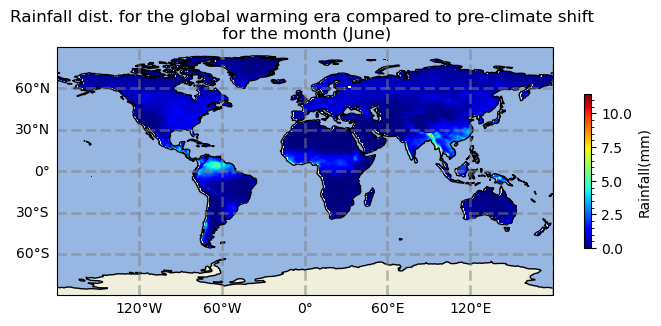

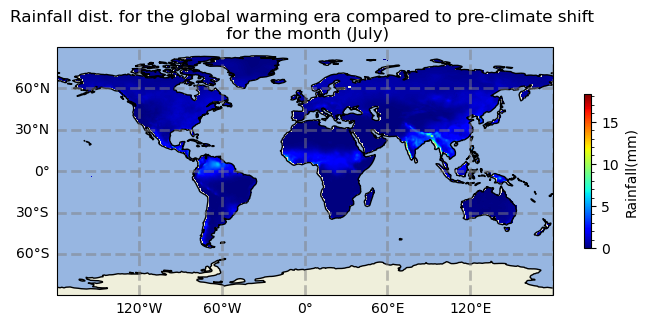

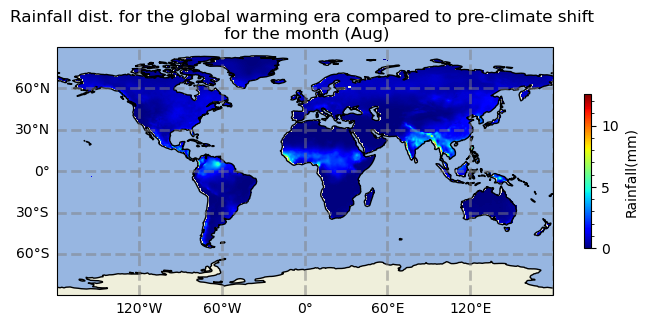

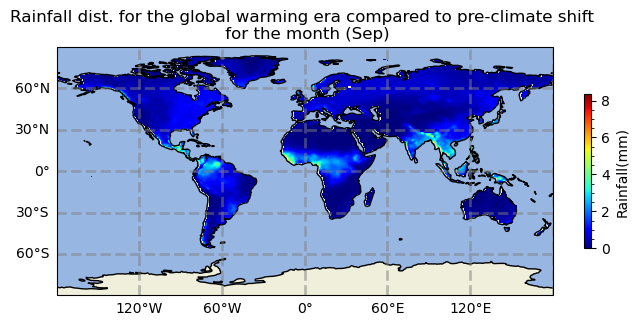

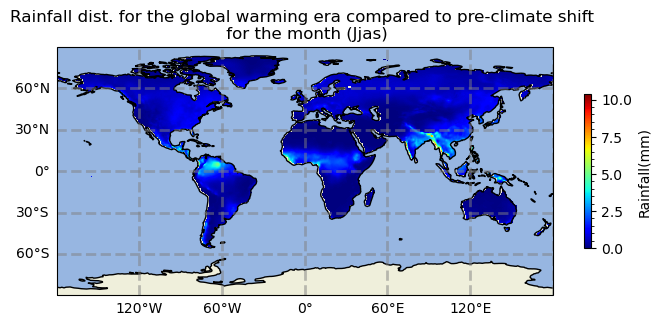

In [9]:
months = ['june','july','aug','sep','jjas']

for i in months:
    data = xr.open_dataset("./cru_1980.2019_" +i+ ".pre.dat.nc"); data_ref = xr.open_dataset("./cru_1950.1979_"+i+".pre.dat.nc")
    data = data.mean(dim='time'); data_ref = data_ref.mean(dim='time')
    data = data['pre']; data_ref = data_ref['pre']

    data_diff = data - data_ref

    lat = data_diff.lat; lon = data_diff.lon

    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
    mp = ax.imshow(data/100,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')

    ax.add_feature(cf.LAND)
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.OCEAN)

    cbar = fig.colorbar(mp, shrink=0.4,label='Rainfall(mm)')
    cbar.minorticks_on()

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    plt.title('Rainfall dist. for the global warming era compared to pre-climate shift \n for the month ('+i.capitalize()+')' )
    plt.savefig('../rainfall/plots/rainfall distribution ('+i.capitalize()+')')